In [194]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
print("Setup Complete")

Setup Complete


#### Creating a synthetic regression dataset

In [560]:
# from sklearn.datasets import make_regression

# X, y, coef = make_regression(
#     n_features=1,
#     coef=True,
#     random_state=0
# )
# X = pd.DataFrame(X)
# y = pd.Series(y)

n_samples = 1000
X = np.linspace(-5, 5, n_samples)
coef = np.random.rand()*10
y = coef * X**2 + np.random.normal(size=n_samples)

5.427836115054737


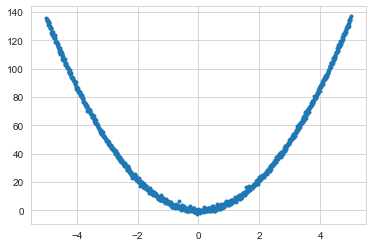

In [561]:
plt.figure()
plt.plot(
    X, y,
    marker='.',
    ls='none'
)
print(coef)

#### building the neural network

In [572]:
input_shape = [1,]

from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
# model = model = keras.Sequential([
#     layers.BatchNormalization(),
#     layers.Dense(units=512),
#     layers.Activation('relu'),
#     layers.Dense(units=1),
# ])

# # Single neuron
# model = keras.Sequential([
#     layers.Dense(units=1),
# ])

# Wide neuron network
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(units=128),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dense(units=1),
])

In [573]:
opt = keras.optimizers.Adam(learning_rate=0.3)

model.compile(
    optimizer=opt,
    loss='mse',
)

In [574]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.001,
#     restore_best_weights=True,
)

lr_schedule = keras.callbacks.ReduceLROnPlateau(
    patience=10,
    factor=0.5,
    min_lr=0.001,
)

In [575]:
history = model.fit(
    X, y,
    batch_size=800,
    epochs=1000,
    validation_split=0.2,
    callbacks=[early_stopping, lr_schedule],
)

Epoch 1/1000
1/1 [==============================] - 1s 791ms/step - loss: 2471.2153 - val_loss: 14689.6416
Epoch 2/1000
1/1 [==============================] - 0s 27ms/step - loss: 1605.6759 - val_loss: 7326.6924
Epoch 3/1000
1/1 [==============================] - 0s 27ms/step - loss: 480.9876 - val_loss: 442.0812
Epoch 4/1000
1/1 [==============================] - 0s 28ms/step - loss: 97.4603 - val_loss: 5045.5264
Epoch 5/1000
1/1 [==============================] - 0s 31ms/step - loss: 539.3538 - val_loss: 10822.4922
Epoch 6/1000
1/1 [==============================] - 0s 28ms/step - loss: 304.0060 - val_loss: 12750.2002
Epoch 7/1000
1/1 [==============================] - 0s 29ms/step - loss: 115.6269 - val_loss: 4897.2954
Epoch 8/1000
1/1 [==============================] - 0s 27ms/step - loss: 386.9108 - val_loss: 937.9565
Epoch 9/1000
1/1 [==============================] - 0s 31ms/step - loss: 355.0632 - val_loss: 975.7277
Epoch 10/1000
1/1 [==============================] - 0s 29ms/s

1/1 [==============================] - 0s 28ms/step - loss: 1.4776 - val_loss: 671.6559
Epoch 81/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4741 - val_loss: 676.1997
Epoch 82/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4706 - val_loss: 681.1630
Epoch 83/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4688 - val_loss: 685.8730
Epoch 84/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4670 - val_loss: 690.3375
Epoch 85/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4652 - val_loss: 694.5714
Epoch 86/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4634 - val_loss: 698.5853
Epoch 87/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4616 - val_loss: 702.3867
Epoch 88/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4599 - val_loss: 705.9857
Epoch 89/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4582 - val_loss: 709

Minimum Loss: 141.4781


<AxesSubplot:>

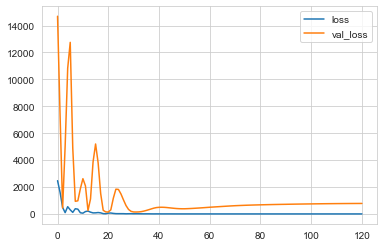

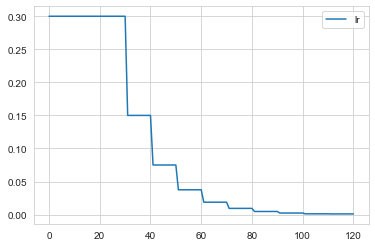

In [576]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Loss: {:0.4f}".format(history_df['val_loss'].min()));
history_df.loc[:, ['lr']].plot()

Text(0, 0.5, 'Target y')

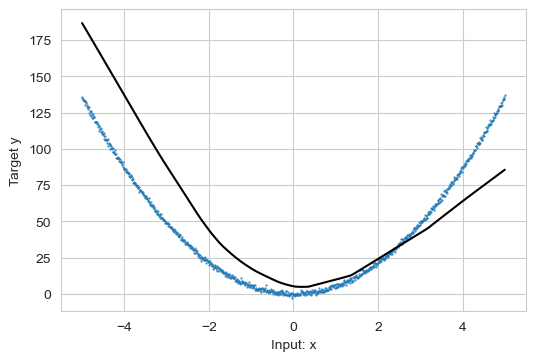

In [577]:
import tensorflow as tf
# x = tf.linspace(X.min()*1.5, X.max()*1.5, 100)
x = tf.linspace(-5, 5, 100)
y_preds = model.predict(x)

plt.figure(dpi=100)

# dataset
plt.plot(
    X, y,
    marker='.', ls='none', ms=1
)
# model
plt.plot(x, y_preds, 'k')

# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")

In [578]:
model.get_weights()

[array([1.5244612], dtype=float32),
 array([0.23720895], dtype=float32),
 array([-0.70431775], dtype=float32),
 array([4.056502], dtype=float32),
 array([[-2.892148  , -0.6776358 ,  2.142955  ,  0.7747868 , -2.7204914 ,
         -2.7631125 ,  0.14588262,  1.6659653 ,  2.049494  ,  1.470656  ,
         -2.3594344 ,  1.2278969 , -1.797144  , -0.11770461, -1.2049842 ,
         -2.774036  , -2.87746   ,  1.4727803 , -2.151631  ,  1.4564277 ,
         -2.2365005 , -2.5351446 , -2.3339865 ,  3.2173193 , -0.33236727,
         -1.8121061 , -2.669707  ,  0.94982314,  1.1862515 ,  1.3742738 ,
         -2.1145084 ,  1.4753823 , -1.8744408 ,  0.23175092,  2.3767295 ,
          0.17765631,  1.28764   , -0.71078026,  1.823857  ,  1.7359309 ,
          0.08538787,  0.7646412 , -0.44324154,  2.3386884 ,  1.1667972 ,
         -2.8140597 ,  3.2320378 ,  0.6393194 ,  1.3381767 , -2.6250296 ,
         -0.66579896, -2.6091237 ,  2.3049846 , -1.9704995 ,  1.922085  ,
         -0.80799085,  2.133736  , -0.14

In [579]:
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_37 (Batc (None, 1)                 4         
_________________________________________________________________
dense_91 (Dense)             (None, 128)               256       
_________________________________________________________________
activation_35 (Activation)   (None, 128)               0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 128)               512       
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 129       
Total params: 901
Trainable params: 643
Non-trainable params: 258
_________________________________________________________________


In [570]:
model.layers

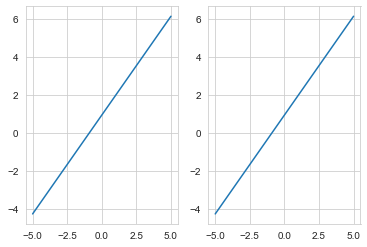

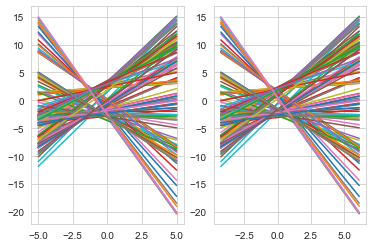

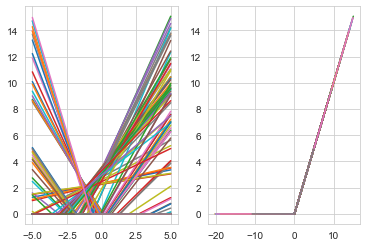

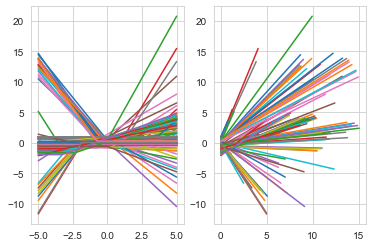

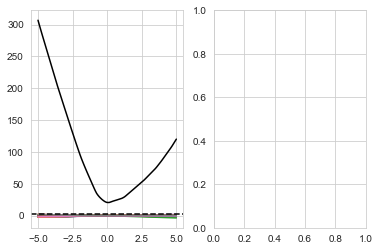

In [571]:
xx = np.linspace(-5, 5, 100)

l0, l1, l2, l3, l4 = model.layers

yy0 = yy = np.expand_dims(xx, 1)

fig, axes = plt.subplots(ncols=2)
yy = l0(yy0)
axes[0].plot(xx, yy)
axes[1].plot(yy0, yy)
yy0 = yy

fig, axes = plt.subplots(ncols=2)
yy = l1(yy0)
axes[0].plot(xx, yy)
axes[1].plot(yy0, yy)
yy0 = yy

fig, axes = plt.subplots(ncols=2)
yy = l2(yy0)
axes[0].plot(xx, yy)
axes[1].plot(yy0, yy)
yy0 = yy

fig, axes = plt.subplots(ncols=2)
yy = l3(yy0)
axes[0].plot(xx, yy)
axes[1].plot(yy0, yy)
yy0 = yy


fig, axes = plt.subplots(ncols=2)
yy = l4(yy0)
axes[0].plot(xx, yy, color='k')
axes[0].plot(xx, yy0*l4.get_weights()[0][0])
axes[0].axhline(l4.get_weights()[1][0], color='k', ls='--')

In [317]:
l2.get_weights()

[array([[0.5229701 ],
        [0.15464096],
        [1.6288921 ],
        [0.1827265 ]], dtype=float32),
 array([1.4445528], dtype=float32)]

In [327]:
yy0

<tf.Tensor: shape=(100, 4), dtype=float32, numpy=
array([[4.45800686e+00, 1.79713392e+00, 0.00000000e+00, 1.08989477e-01],
       [4.36794567e+00, 1.75011420e+00, 0.00000000e+00, 1.06787667e-01],
       [4.27788496e+00, 1.70309496e+00, 0.00000000e+00, 1.04585864e-01],
       [4.18782425e+00, 1.65607548e+00, 0.00000000e+00, 1.02384053e-01],
       [4.09776354e+00, 1.60905623e+00, 0.00000000e+00, 1.00182250e-01],
       [4.00770283e+00, 1.56203675e+00, 0.00000000e+00, 9.79804322e-02],
       [3.91764235e+00, 1.51501727e+00, 0.00000000e+00, 9.57786366e-02],
       [3.82758141e+00, 1.46799779e+00, 0.00000000e+00, 9.35768187e-02],
       [3.73752093e+00, 1.42097855e+00, 0.00000000e+00, 9.13750157e-02],
       [3.64745998e+00, 1.37395883e+00, 0.00000000e+00, 8.91732052e-02],
       [3.55739927e+00, 1.32693958e+00, 0.00000000e+00, 8.69714022e-02],
       [3.46733832e+00, 1.27992010e+00, 0.00000000e+00, 8.47695917e-02],
       [3.37727761e+00, 1.23290062e+00, 0.00000000e+00, 8.25677887e-02],
 